In [87]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from pprint import pprint

#BITCOIN API: url setup AND start/end date variables
url = 'https://api.coindesk.com/v1/bpi/historical/close.json?'
default = 'start=2020-01-01&end=2020-12-31'
start_date = '2020-01-01'
end_date = '2020-12-31'

# DOW: file to Load, read csv, dataframe
file_to_load = "data/dow.csv"
dow_data = pd.read_csv(file_to_load)
dow_data_df = pd.DataFrame(dow_data)

# GOLD: file to load, read csv, dataframe
file_to_load = "data/gold.csv"
gold_data = pd.read_csv(file_to_load)
gold_data_df = pd.DataFrame(gold_data)

In [69]:
# BITCOIN: create query url for start and end date, request json
query_url = f'{url}start={start_date}&end={end_date}'
pprint(requests.get(query_url).json())

{'bpi': {'2020-01-01': 7188.4633,
         '2020-01-02': 6961.5683,
         '2020-01-03': 7346.58,
         '2020-01-04': 7355.855,
         '2020-01-05': 7356.3117,
         '2020-01-06': 7761.825,
         '2020-01-07': 8157.7617,
         '2020-01-08': 8042.8733,
         '2020-01-09': 7816.9233,
         '2020-01-10': 8189.265,
         '2020-01-11': 8016.4267,
         '2020-01-12': 8178.8833,
         '2020-01-13': 8105.4783,
         '2020-01-14': 8807.4267,
         '2020-01-15': 8808.4867,
         '2020-01-16': 8716.9133,
         '2020-01-17': 8890.25,
         '2020-01-18': 8901.17,
         '2020-01-19': 8698.5717,
         '2020-01-20': 8631.2883,
         '2020-01-21': 8727.6033,
         '2020-01-22': 8661.01,
         '2020-01-23': 8392.145,
         '2020-01-24': 8436.49,
         '2020-01-25': 8337.1017,
         '2020-01-26': 8602.7417,
         '2020-01-27': 8901.5067,
         '2020-01-28': 9393.2733,
         '2020-01-29': 9290.46,
         '2020-01-30': 9508.72

In [72]:
# BITCOIN: create response, create dataframe of date range results from API
response = requests.get(query_url).json()
my_dict = response['bpi']
test_df = pd.DataFrame(list(my_dict.items()),columns = ['close date','close price']) 

# test_df

In [83]:
# DOW: clean data (take out out-of-range data based on start_/end_date variables above)
# return only date and close price columns
dow_cleaned = dow_data_df.loc[(dow_data_df['Date'] >= start_date) & (dow_data_df['Date'] <= end_date)]
dow_cleaned = dow_cleaned[['Date','Close']]

# rename date column to prep for merge
dow_df = dow_cleaned.rename(columns={'Date':'close date'})

# dow_df

In [89]:
# GOLD: clean data - convert to_datetime
gold_data_df['Date'] = pd.to_datetime(gold_data_df['Date'])

# clean data - take out out-of-range data based on start_/end_date variables above
# return only date and close price columns
gold_cleaned = gold_data_df.loc[(gold_data_df['Date'] >= start_date) & (gold_data_df['Date'] <= end_date)]
gold_cleaned = gold_cleaned.sort_values(by=['Date']).reset_index(drop=True)
gold_cleaned = gold_cleaned[['Date','Volume']]
gold_cleaned

# rename date column to prep for merge

KeyError: "['Volume'] not in index"

In [62]:
# BITCOIN & 
merged = pd.merge(test_df, dow_df, on='close date', how='left')
merged = merged.rename(columns={'close date':'Date','close price':'Bitcoin', 'Close':'Dow'})
merged

,Date,Bitcoin,Dow
0,2020-01-01,7188.4633,NaN
1,2020-01-02,6961.5683,28868.800781
2,2020-01-03,7346.5800,28634.880859
3,2020-01-04,7355.8550,NaN
4,2020-01-05,7356.3117,NaN
...,...,...,...
361,2020-12-27,26248.2767,NaN
362,2020-12-28,27041.8667,30403.970703
363,2020-12-29,27353.9783,30335.669922
364,2020-12-30,28886.0400,30409.560547


In [63]:
# setting axes to variables
bitcoin_x
bitcoin_y
dow_x
dow_y
gold_x
gold_y


NameError: name 'bitcoin_x' is not defined

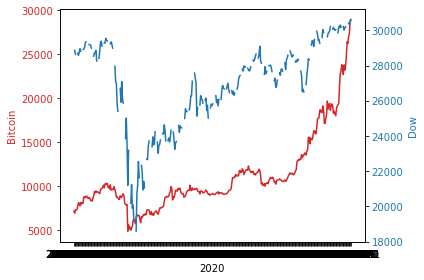

In [64]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('2020')
ax1.set_ylabel('Bitcoin', color=color)
ax1.plot(merged['Date'], merged['Bitcoin'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.plot()

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Dow', color=color)
ax2.plot(merged['Date'], merged['Dow'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

# x_axis = merged['Date']
# y_axis = merged['Bitcoin']
# plt.xlabel('2020')
# plt.plot(x_axis, y_axis)
# y_dow = merged['Dow']
# plt.plot(x_axis, y_dow, secondary_y=True)

# here's the link to the info on overlaying two axes: 
# https://matplotlib.org/gallery/api/two_scales.html

In [ ]:
test_df.describe()

In [ ]:
fig1, ax1 = plt.subplots()
ax1.set_title('Drug Regimens: Final Tumor Volumes of the Top 4 Drug Regimens')
ax1.set_ylabel('Tumor Volume')
ax1.boxplot(test_df['close price'])
plt.xlabel('January 1st - January 31st')
plt.show()

#make data folder outside jupyter notebook

Meredith: covid border shut down: february 28-march 26, 2020
Darren: george floyd/social protests: may 25-june 25, 2020
Ryan: election: nov 2-nov 9